In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/kaggle/input/iris-dataset/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Label encode Species
from sklearn.preprocessing import LabelEncoder

In [5]:
encoder = LabelEncoder()

In [6]:
df['species'] = encoder.fit_transform(df['species'])

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

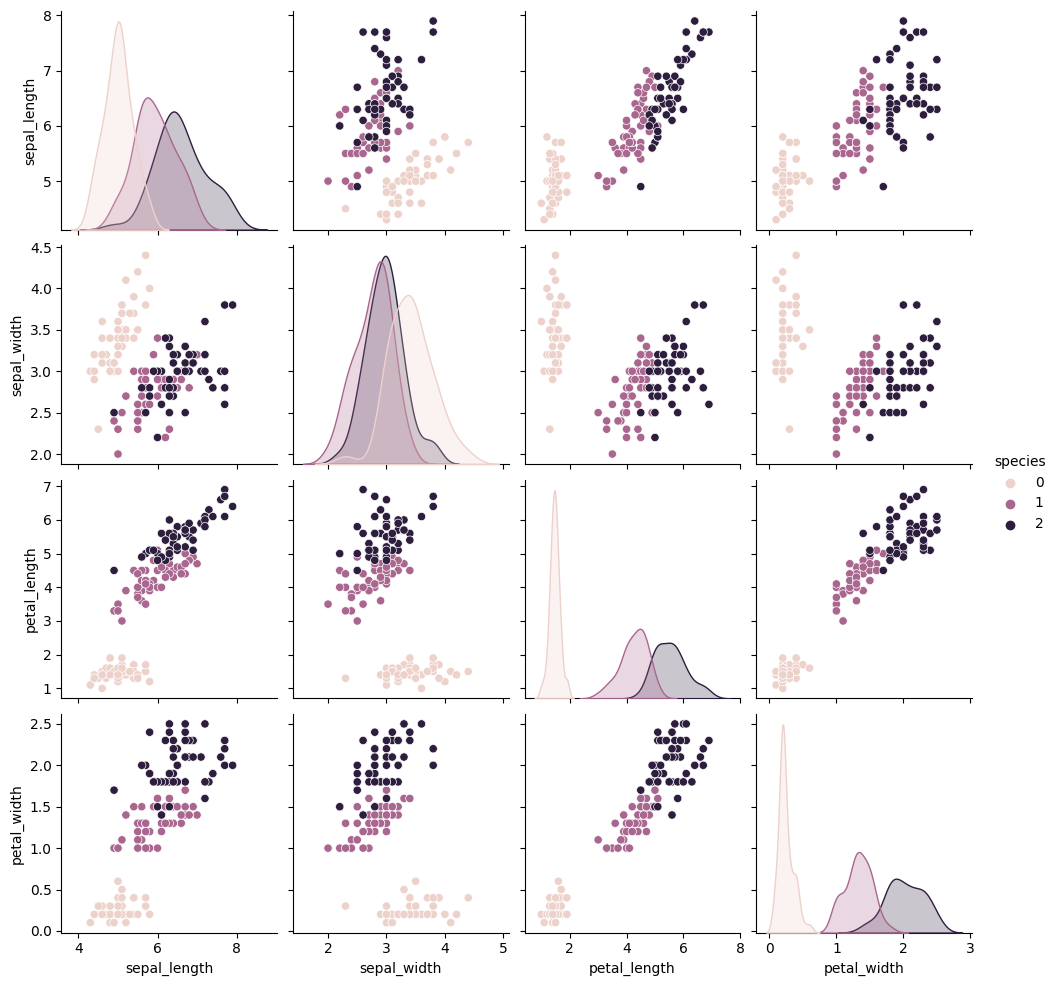

In [8]:
import seaborn as sns
sns.pairplot(df,hue='species')

In [9]:
new_df = df[df['species'] != 0][['sepal_length','sepal_width','species']]

In [10]:
new_df.head()

,sepal_length,sepal_width,species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [11]:
new_df.shape

(100, 3)

In [12]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [14]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [15]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

In [16]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.81
rf 0.73
knn 0.76


In [17]:
from sklearn.ensemble import VotingClassifier

# ***Hard Voting***

In [18]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.77


# ***Soft Voting***

In [19]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.77


# ***Weighted Voting***

In [20]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))
      

for i=1,j=1,k=1 0.75
for i=1,j=1,k=2 0.76
for i=1,j=1,k=3 0.75
for i=1,j=2,k=1 0.76
for i=1,j=2,k=2 0.74
for i=1,j=2,k=3 0.75
for i=1,j=3,k=1 0.73
for i=1,j=3,k=2 0.73
for i=1,j=3,k=3 0.76
for i=2,j=1,k=1 0.77
for i=2,j=1,k=2 0.77
for i=2,j=1,k=3 0.77
for i=2,j=2,k=1 0.76
for i=2,j=2,k=2 0.76
for i=2,j=2,k=3 0.76
for i=2,j=3,k=1 0.75
for i=2,j=3,k=2 0.76
for i=2,j=3,k=3 0.75
for i=3,j=1,k=1 0.8
for i=3,j=1,k=2 0.78
for i=3,j=1,k=3 0.79
for i=3,j=2,k=1 0.78
for i=3,j=2,k=2 0.77
for i=3,j=2,k=3 0.77
for i=3,j=3,k=1 0.77
for i=3,j=3,k=2 0.77
for i=3,j=3,k=3 0.77


# ***Classifiers of Same Algo***

In [21]:
from sklearn.svm import SVC

In [22]:
from sklearn.datasets import make_classification

In [23]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

In [24]:
svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

In [25]:
estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

In [26]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [27]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93


In [28]:
vc1 = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.91
